# One-dimensional packing problems - BF

- Olejniczak Tom, Jiajia REN, Rim Belkorchi, Hamza CHAIBOUB

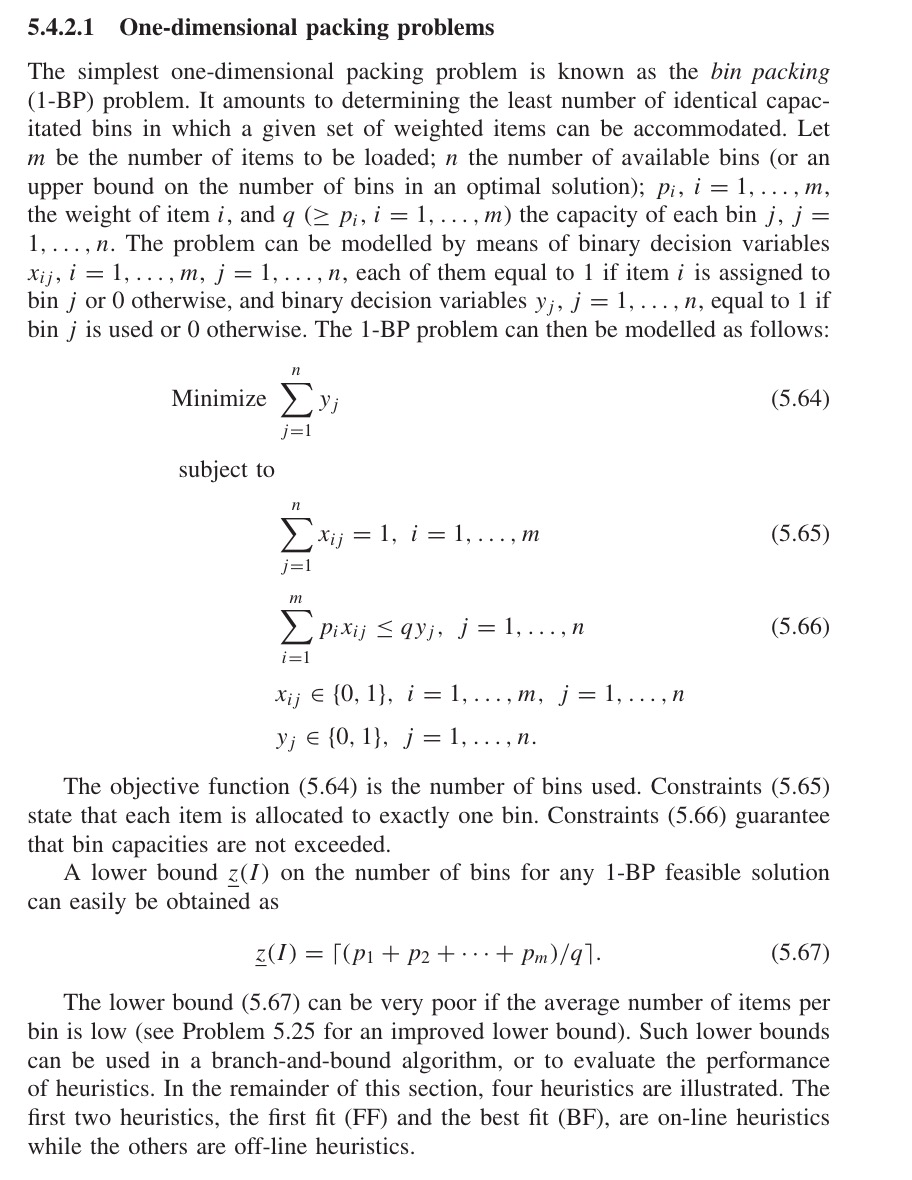

In [1]:
from IPython.display import Image
exercice = r"/Users/jiajiaren/Desktop/M2/M2-2/Advanced analytics in logistics/New/One-dimensional.jpg"
display(Image(filename=exercice))

# 1. Problem presentation


One-dimensional packing problems
The 1-Dimensional Bin Packing (1-BP) problem is a classic optimization problem. It deals with efficiently allocating objects of different sizes into a fixed number of containers or "bins" while minimizing the number of bins used. This is a simplistic abstraction of real-world problems like loading trucks with packages. The challenge is to minimize the number of bins.

Bin packing problem: 

    - how to fit a set of items, each with a specific weight, into the smallest number of bins possible without exceeding each bin's maximum capacity;
 
    - 1 item allocated (or not) to exactly 1 bin
    
    - objective: minimize the number of bins used, ensuring an efficient packing strategy (binary decision variable)
    
    - + calculates a basic lower bound for the minimum number of bins needed
    
Defining the parameters:

    - decision variables: 

        - y: binary/boolean decision variable -> bin used or not

        - x: binary/boolean decision variable -> item in bin or not 
    
    - i: item
    
    - j: bin
    
    - q: weight capacity of each bin
    
Goal(OF:5.64): Minimize the number of bins 

This equation represents the goal of minimizing the total number of bins used.
S.T:

    - (5.65) sum of mean of binary decision = 1: Each item must be placed in exactly one bin.This ensures that every item is allocated to a bin
  
    - (5.66) sum of bin capacity higher or equal to sum of item weights to guarante that the capacity of each bin is not exceeded
    
    - an item is either in a bin (1) or not (0)
    
    - a bin is either used (1) or not (0)
Lower Bound (5.67)
    - The lower bound for the number of bins required is the ceiling of the total weight of all items divided by the average bin capacity, ensuring at least one bin if there's any item to pack.

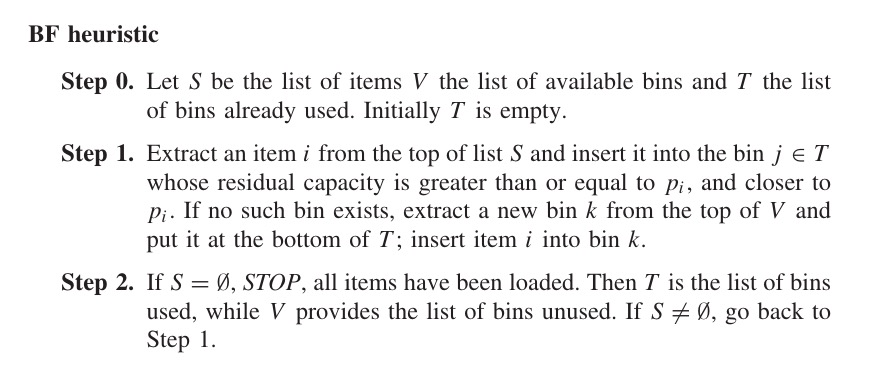

In [2]:
#Best Fit (BF) Heuristic for Bin Packing
from IPython.display import Image
BF_step = r"/Users/jiajiaren/Desktop/M2/M2-2/Advanced analytics in logistics/New/BF step.jpg"
display(Image(filename=BF_step))

The Best Fit heuristic is an algorithm used to address the Bin Packing Problem. It focuses on placing each item into the bin that will leave the least leftover space after the item is inserted, aiming to minimize the number of bins used. 

Specific problem we will be focusing on:

- Al Bahar is an Egyptian trucking company located in Alexandria which must plan the shipment of 17 parcels
- Parcels sorted by non-increasing weights
- Each van has a maximum capacity of 600 kilograms
- 17 Parcels: 4 weighting 252, 3 weighting 228, 3 weighting 180, 3 weighting 140, 4 weighting 120

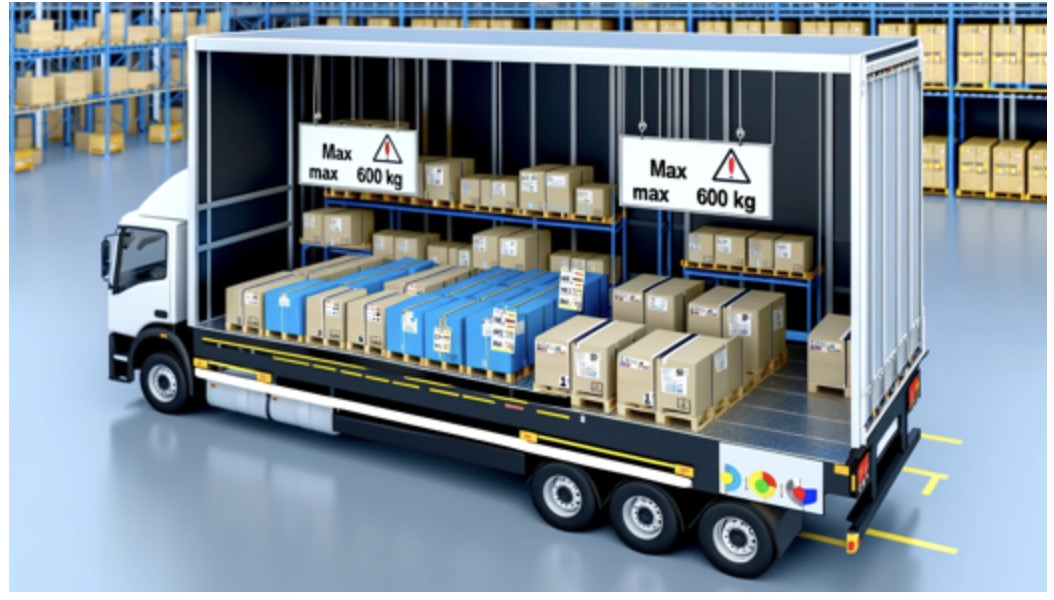

In [3]:
pic = r"/Users/jiajiaren/Desktop/M2/M2-2/Advanced analytics in logistics/New/pic.jpg"
display(Image(filename=pic))

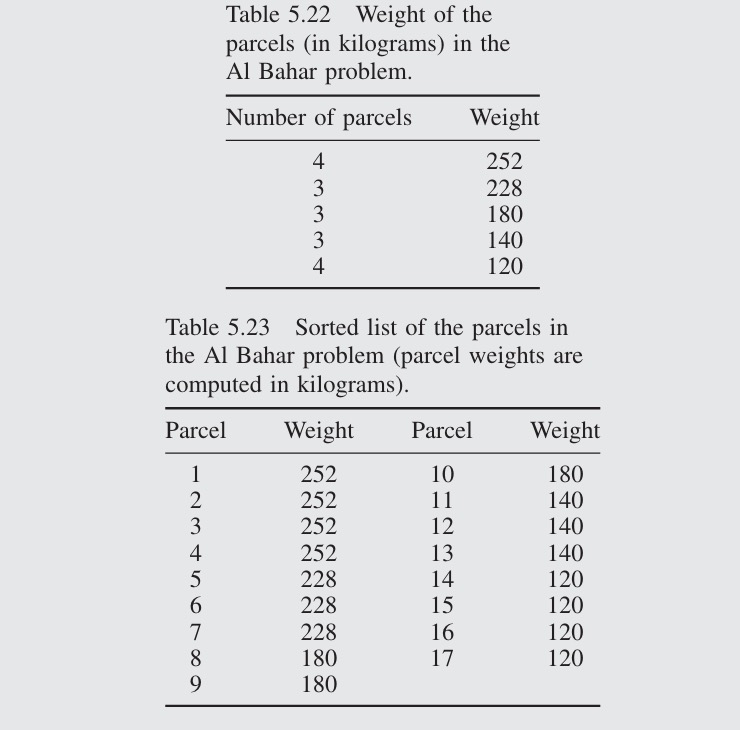

In [4]:
exercice = r"/Users/jiajiaren/Desktop/M2/M2-2/Advanced analytics in logistics/New/Data.jpg"
display(Image(filename=exercice))

In [5]:
from docplex.mp.model import Model
import numpy as np
import pandas as pd
import time
from numpy import random
import random

In [6]:
parcels = [252, 252, 252, 252, 228, 228, 228, 180, 180, 180, 140, 140, 140, 120, 120, 120, 120]

id_width = max(len(str(index + 1)) for index, value in enumerate(parcels)) + 1
value_width = max(len(str(value)) for value in parcels) + 1

print(f"{'Parcel Number'.ljust(id_width)}| {'Value'.ljust(value_width)}")
print('-' * (id_width + value_width + 2))

for index, value in enumerate(parcels):
    parcel_id = index + 1
    print(f"{str(parcel_id).ljust(id_width)}| {str(value).ljust(value_width)}")


Parcel Number| Value
---------
1  | 252 
2  | 252 
3  | 252 
4  | 252 
5  | 228 
6  | 228 
7  | 228 
8  | 180 
9  | 180 
10 | 180 
11 | 140 
12 | 140 
13 | 140 
14 | 120 
15 | 120 
16 | 120 
17 | 120 


In [7]:
weight_count = {}
for weight in parcels: 
    if weight in weight_count:
        weight_count[weight] += 1
    else:
        weight_count[weight] = 1

print("Number of Parcels | Weight")
for weight, count in sorted(weight_count.items()):
    print(f"{count:<17} | {weight}")

Number of Parcels | Weight
4                 | 120
3                 | 140
3                 | 180
3                 | 228
4                 | 252


In [8]:
van_capacity = 600
vans = []

# 2. Linear Programming Model

In [9]:
# Create a new model
mdl = Model("AlBaharTrucking")

# Create decision variables
# x[i][j] = 1 if parcel i is assigned to trip j, else 0
x = mdl.binary_var_matrix(len(parcels), len(parcels), name="x")

# y[j] = 1 if trip j is used, else 0
y = mdl.binary_var_list(len(parcels), name="y")

# Objective function: Minimize the number of trips used
mdl.minimize(mdl.sum(y[j] for j in range(len(parcels))))

# Constraints
# Each package must be on exactly one trip
for i in range(len(parcels)):
    mdl.add_constraint(mdl.sum(x[i, j] for j in range(len(parcels))) == 1, f"Parcel_{i}_Trip_Assignment")

# The load capacity of each trip cannot exceed the truck's capacity
for j in range(len(parcels)):
    mdl.add_constraint(mdl.sum(parcels[i] * x[i, j] for i in range(len(parcels))) <= van_capacity * y[j], f"Capacity_Limit_Trip_{j}")

start_time = time.time()

# Solve the model
solution = mdl.solve()
end_time = time.time()
solve_time = end_time - start_time
print(f"Solve time: {solve_time} seconds")

# Check if a solution is found
if solution:
    print("Solution status: ", mdl.solve_details.status)
    print("Minimum number of trips required: ", mdl.objective_value)
    for j in range(len(parcels)):
        if y[j].solution_value > 0.5:  # Trip is used
            print(f"Trip {j+1} contains parcels:", end=" ")
            total_weight = 0
            for i in range(len(parcels)):
                if x[i, j].solution_value > 0.5:
                    print(i + 1, end=" ")
                    total_weight += parcels[i]
            print(f"with total weight {total_weight} kg")
else:
    print("No solution found.")

Solve time: 0.0046520233154296875 seconds
Solution status:  integer optimal solution
Minimum number of trips required:  6.0
Trip 1 contains parcels: 1 2 with total weight 504 kg
Trip 2 contains parcels: 3 4 with total weight 504 kg
Trip 3 contains parcels: 5 6 11 with total weight 596 kg
Trip 4 contains parcels: 7 8 9 with total weight 588 kg
Trip 5 contains parcels: 10 12 13 14 with total weight 580 kg
Trip 6 contains parcels: 15 16 17 with total weight 360 kg


# - 10 times bigger than the original one

In [15]:
# Defining min_value and max_value:
min_value = min(parcels)
max_value = max(parcels)
new_parcels = [random.randint(min_value, max_value) for _ in parcels]

def generate_randomized_dataset(parcels, scale_factor):
    
    new_dataset = []
    for _ in range(scale_factor):
        randomized_parcels = new_parcels.copy()
        random.shuffle(randomized_parcels)
        new_dataset.extend(randomized_parcels)

    return new_dataset

randomized_dataset = generate_randomized_dataset(new_parcels, 10)
# Printing the Results
print(len(randomized_dataset))
print(randomized_dataset)

170
[193, 165, 246, 153, 243, 242, 120, 236, 152, 171, 230, 128, 210, 197, 200, 225, 165, 165, 242, 128, 197, 225, 210, 246, 165, 200, 243, 236, 230, 153, 193, 152, 120, 171, 236, 200, 246, 171, 193, 243, 242, 120, 225, 165, 197, 128, 152, 230, 165, 210, 153, 246, 165, 225, 200, 197, 128, 152, 210, 230, 165, 171, 236, 153, 193, 242, 120, 243, 243, 210, 165, 171, 197, 193, 236, 153, 242, 246, 152, 230, 225, 128, 200, 120, 165, 197, 230, 193, 171, 242, 128, 200, 243, 153, 165, 236, 165, 246, 152, 210, 120, 225, 171, 165, 200, 153, 230, 165, 152, 197, 242, 225, 236, 193, 128, 210, 243, 120, 246, 242, 152, 236, 246, 193, 165, 225, 128, 243, 153, 200, 165, 171, 210, 120, 197, 230, 153, 128, 165, 242, 120, 210, 193, 197, 236, 230, 243, 246, 200, 225, 171, 152, 165, 197, 246, 230, 120, 243, 128, 152, 210, 165, 200, 171, 153, 236, 242, 225, 193, 165]


## - 10 Times datasets for LP

In [16]:
# Model for Randomized Dataset
mdl_randomized = Model("AlBaharTrucking_Randomized")

# Decision variables
x_randomized = mdl_randomized.binary_var_matrix(len(randomized_dataset), len(randomized_dataset), name="x")
y_randomized = mdl_randomized.binary_var_list(len(randomized_dataset), name="y")

# Objective function: Minimize the number of trips used
mdl_randomized.minimize(mdl_randomized.sum(y_randomized[j] for j in range(len(randomized_dataset))))

# Constraints
for i in range(len(randomized_dataset)):
    mdl_randomized.add_constraint(mdl_randomized.sum(x_randomized[i, j] for j in range(len(randomized_dataset))) == 1)

for j in range(len(randomized_dataset)):
    mdl_randomized.add_constraint(mdl_randomized.sum(randomized_dataset[i] * x_randomized[i, j] for i in range(len(randomized_dataset))) <= van_capacity * y_randomized[j])

# Solve the model
start_time = time.time()
solution_randomized = mdl_randomized.solve()
end_time = time.time()

# Print results
print(f"Solve time: {end_time - start_time} seconds")
if solution_randomized:
    print("Solution status: ", solution_randomized.solve_status)
    print(f"Number of van trips required: {solution_randomized.objective_value}")

    # Initialize a list to store used van details
    used_vans = []

    # Iterate through y_randomized to gather details of used vans
    for j in range(len(randomized_dataset)):
        if y_randomized[j].solution_value > 0.5:
            parcels_in_van = [i + 1 for i in range(len(randomized_dataset)) if x_randomized[i, j].solution_value > 0.5]
            total_weight = sum(randomized_dataset[i] for i in range(len(randomized_dataset)) if x_randomized[i, j].solution_value > 0.5)
            used_vans.append({'total_weight': total_weight, 'parcels': parcels_in_van})

    # Renumber and print the used vans sequentially
    for van_number, van in enumerate(used_vans, start=1):
        parcel_list = ', '.join(map(str, van['parcels']))
        print(f"Van {van_number}: Total weight {van['total_weight']} kg, Parcels: {parcel_list}")
else:
    print("No solution found.")

Solve time: 135.24289798736572 seconds
Solution status:  JobSolveStatus.OPTIMAL_SOLUTION
Number of van trips required: 55.0
Van 1: Total weight 598 kg, Parcels: 10, 86, 156
Van 2: Total weight 594 kg, Parcels: 1, 76, 82, 134
Van 3: Total weight 590 kg, Parcels: 2, 36, 54
Van 4: Total weight 599 kg, Parcels: 50, 106, 145
Van 5: Total weight 599 kg, Parcels: 101, 113, 147
Van 6: Total weight 600 kg, Parcels: 56, 142, 143
Van 7: Total weight 593 kg, Parcels: 33, 136, 158
Van 8: Total weight 595 kg, Parcels: 3, 9, 135
Van 9: Total weight 597 kg, Parcels: 47, 152, 159, 170
Van 10: Total weight 598 kg, Parcels: 30, 46, 99, 139
Van 11: Total weight 576 kg, Parcels: 37, 61, 85
Van 12: Total weight 587 kg, Parcels: 16, 141, 167
Van 13: Total weight 586 kg, Parcels: 12, 44, 97, 138
Van 14: Total weight 599 kg, Parcels: 64, 83, 119
Van 15: Total weight 600 kg, Parcels: 19, 31, 153
Van 16: Total weight 599 kg, Parcels: 40, 67, 75
Van 17: Total weight 595 kg, Parcels: 68, 109, 163
Van 18: Total wei

# 3. Iteration of BF

In [12]:
# Assigning IDs to Parcels and Sorting Them
parcels_with_ids = [(idx + 1, weight) for idx, weight in enumerate(parcels)]
parcels_sorted = sorted(parcels_with_ids, key=lambda x: x[1], reverse=True)

# Starting the timer before executing the Best Fit algorithm
start_time = time.time()

# Executing the Best Fit Algorithm
for parcel_number, parcel_weight in parcels_sorted:
    best_fit = None
    best_fit_idx = None
    for idx, van in enumerate(vans):
        if van['total_weight'] + parcel_weight <= van_capacity:
            remaining_capacity = van_capacity - (van['total_weight'] + parcel_weight)
            if best_fit is None or remaining_capacity < best_fit:
                best_fit = remaining_capacity
                best_fit_idx = idx
    if best_fit_idx is not None:
        vans[best_fit_idx]['parcels'].append(parcel_number)
        vans[best_fit_idx]['total_weight'] += parcel_weight
    else:
        vans.append({'total_weight': parcel_weight, 'parcels': [parcel_number]})

# Stopping the timer after executing the algorithm
end_time = time.time()

# Printing solve time and solution status
solve_time = end_time - start_time
print(f"Solve time: {solve_time} seconds")

# Printing Van Utilization
print("Solution status: OPTIMAL_SOLUTION")  # Since it's a heuristic, we assume it's optimal for the algorithm
print(f"Number of van trips required: {len(vans)}")
for i, van in enumerate(vans, start=1):
    print(f"Van {i}: Total weight {van['total_weight']} kg, Parcels: {van['parcels']}")


Solve time: 6.318092346191406e-05 seconds
Solution status: OPTIMAL_SOLUTION
Number of van trips required: 6
Van 1: Total weight 504 kg, Parcels: [1, 2]
Van 2: Total weight 504 kg, Parcels: [3, 4]
Van 3: Total weight 596 kg, Parcels: [5, 6, 11]
Van 4: Total weight 588 kg, Parcels: [7, 8, 9]
Van 5: Total weight 580 kg, Parcels: [10, 12, 13, 14]
Van 6: Total weight 360 kg, Parcels: [15, 16, 17]


# - 10 Times datasets for BF

In [17]:
parcels_sorted = sorted(randomized_dataset, reverse=True)
# Best Fit algorithm for the expanded dataset
randomized_dataset_with_ids = [(idx + 1, weight) for idx, weight in enumerate(randomized_dataset)]
randomized_dataset_sorted = sorted(randomized_dataset_with_ids, key=lambda x: x[1], reverse=True)

# Start timing
start_time = time.time()

# Execute the Best Fit algorithm
vans = []
for parcel_number, parcel_weight in randomized_dataset_sorted:
    best_fit = None
    best_fit_idx = None
    for idx, van in enumerate(vans):
        if van['total_weight'] + parcel_weight <= van_capacity:
            remaining_capacity = van_capacity - (van['total_weight'] + parcel_weight)
            if best_fit is None or remaining_capacity < best_fit:
                best_fit = remaining_capacity
                best_fit_idx = idx
    if best_fit_idx is not None:
        if 'parcels' not in vans[best_fit_idx]:
            vans[best_fit_idx]['parcels'] = []
        vans[best_fit_idx]['parcels'].append(parcel_number)
        vans[best_fit_idx]['total_weight'] += parcel_weight
    else:
        vans.append({'total_weight': parcel_weight, 'parcels': [parcel_number]})

# Stop timing
end_time = time.time()

# Output the results
solve_time = end_time - start_time
print(f"Solve time: {solve_time} seconds")
print("Solution status: OPTIMAL_SOLUTION")  # Assuming the Best Fit algorithm finds an optimal solution

# Print van details
print(f"Number of van trips required: {len(vans)}")
for i, van in enumerate(vans, start=1):
    parcel_list = ', '.join(str(p) for p in van['parcels'])
    print(f"Van {i}: Total weight {van['total_weight']} kg, Parcels: {parcel_list}")

Solve time: 0.0015959739685058594 seconds
Solution status: OPTIMAL_SOLUTION
Number of van trips required: 60
Van 1: Total weight 492 kg, Parcels: 3, 24
Van 2: Total weight 492 kg, Parcels: 37, 52
Van 3: Total weight 492 kg, Parcels: 78, 98
Van 4: Total weight 492 kg, Parcels: 119, 123
Van 5: Total weight 492 kg, Parcels: 148, 155
Van 6: Total weight 486 kg, Parcels: 5, 27
Van 7: Total weight 486 kg, Parcels: 40, 68
Van 8: Total weight 486 kg, Parcels: 69, 93
Van 9: Total weight 486 kg, Parcels: 117, 128
Van 10: Total weight 486 kg, Parcels: 147, 158
Van 11: Total weight 484 kg, Parcels: 6, 19
Van 12: Total weight 484 kg, Parcels: 41, 66
Van 13: Total weight 484 kg, Parcels: 77, 90
Van 14: Total weight 484 kg, Parcels: 111, 120
Van 15: Total weight 484 kg, Parcels: 140, 167
Van 16: Total weight 600 kg, Parcels: 8, 28, 12
Van 17: Total weight 600 kg, Parcels: 35, 63, 20
Van 18: Total weight 600 kg, Parcels: 75, 96, 46
Van 19: Total weight 600 kg, Parcels: 113, 122, 57
Van 20: Total weigh

# 4. CPLEX vs Solution Method Comparison Table

In [18]:
# Create data
data = {
    ('Objective Value', 'CPLEX'): [6, 55],
    ('Objective Value', 'BF'): [6, 60],
    ('CPU Time', 'CPLEX'): [0.00465, 135.24289],
    ('CPU Time', 'BF'): [0.000063, 0.001596]
}

index = ['Original', 'Large']
df = pd.DataFrame(data, index=index)

# Apply styling
styled_df = df.style.set_table_styles(
    [{'selector': 'th, td',
      'props': [('border', '1px solid black'), ('font-size', '12pt'), ('text-align', 'center')]}],
    overwrite=False
).set_properties(**{'width': '100px', 'height': '30px'})

# Display the styled DataFrame
styled_df

- CPLEX can provide optimal solutions, but for large datasets need more computation time.
- BF is much faster than the CPLEX method for large datasets, but it can only provide suboptimal solutions.